In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv("Motor_Vehicle_Collisions.csv")

C:\Users\19403\AppData\Local\Temp\ipykernel_7676\3941913711.py:1: DtypeWarning: Columns (0,1,2,6,7,8,9,18,19,20,21,22,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Motor_Vehicle_Collisions.csv")


In [4]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,3/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,6/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN


In [12]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors = 'coerce')
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format = '%H:%M', errors = 'coerce').dt.time

In [16]:
df['CRASH TIME']

0          02:39:00
1          11:45:00
2          06:55:00
3          09:35:00
4          08:13:00
             ...   
1048570         NaT
1048571         NaT
1048572         NaT
1048573         NaT
1048574         NaT
Name: CRASH TIME, Length: 1048575, dtype: object

In [18]:
df = df.dropna(subset=['BOROUGH', 'NUMBER OF PERSONS INJURED'])

In [19]:
df['ZIP CODE'].fillna('Unknown', inplace=True)
df['ON STREET NAME'].fillna('Unknown', inplace=True)

C:\Users\19403\AppData\Local\Temp\ipykernel_7676\1016190963.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['ZIP CODE'].fillna('Unknown', inplace=True)
C:\Users\19403\AppData\Local\Temp\ipykernel_7676\1016190963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZIP CODE'].fillna('Unknown', inplace=True)
C:\Users\19403\AppData\Local\Temp\ipykernel_7676\1016190963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ON STREET NAME'].fil

In [20]:
df['YEAR'] = df['CRASH DATE'].dt.year
df['MONTH'] = df['CRASH DATE'].dt.month
df['DAY_OF_WEEK'] = df['CRASH DATE'].dt.dayofweek

C:\Users\19403\AppData\Local\Temp\ipykernel_7676\721256417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR'] = df['CRASH DATE'].dt.year
C:\Users\19403\AppData\Local\Temp\ipykernel_7676\721256417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['CRASH DATE'].dt.month
C:\Users\19403\AppData\Local\Temp\ipykernel_7676\721256417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [21]:
df['INJURY'] = np.where(df['NUMBER OF PERSONS INJURED'] > 0, 1, 0)

C:\Users\19403\AppData\Local\Temp\ipykernel_7676\3527011812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INJURY'] = np.where(df['NUMBER OF PERSONS INJURED'] > 0, 1, 0)


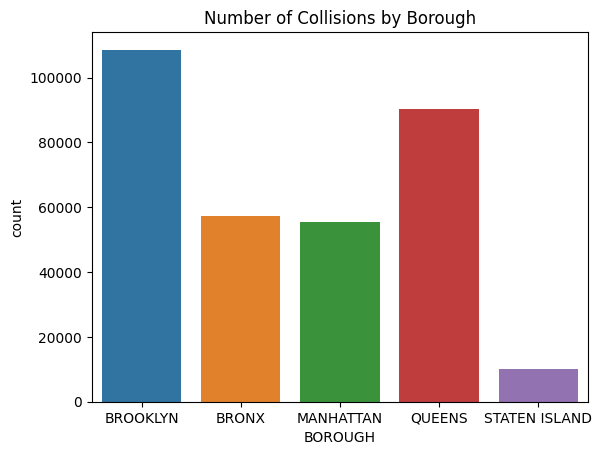

In [22]:
sns.countplot(x='BOROUGH', data=df)
plt.title('Number of Collisions by Borough')
plt.show()

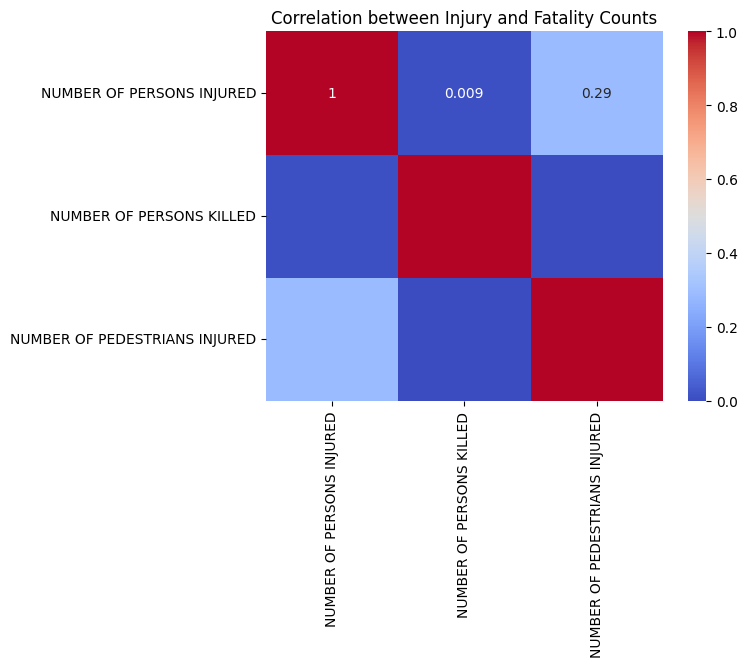

In [23]:
# Check correlation between numeric features
correlation_matrix = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Injury and Fatality Counts')
plt.show()

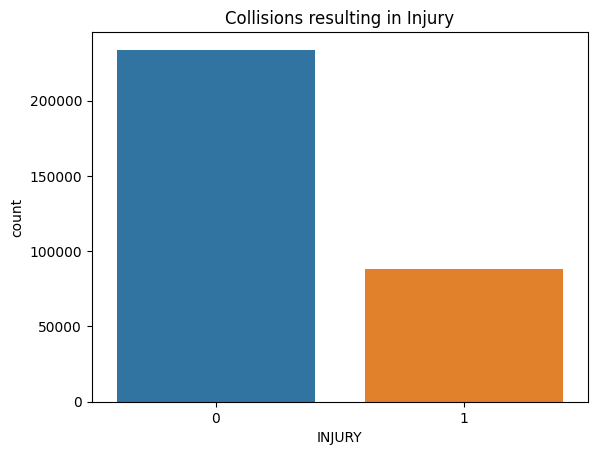

In [24]:
sns.countplot(x='INJURY', data=df)
plt.title('Collisions resulting in Injury')
plt.show()


# whether an accident will result in injury using a Random Forest Classifier.

In [25]:
features = ['BOROUGH', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF MOTORIST INJURED']
df = df[features + ['INJURY']]

In [26]:
df = pd.get_dummies(df, columns=['BOROUGH'], drop_first=True)

In [27]:
X = df.drop('INJURY', axis=1)
y = df['INJURY']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf.predict(X_test)


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9502903095600336
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46763
           1       1.00      0.82      0.90     17651

    accuracy                           0.95     64414
   macro avg       0.97      0.91      0.93     64414
weighted avg       0.95      0.95      0.95     64414



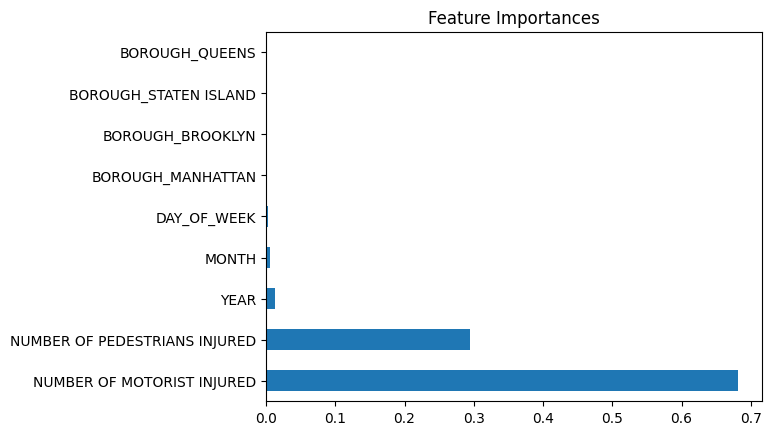

In [32]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Logistic Regression for Injury Prediction

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [34]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred_logreg = logreg.predict(X_test)

In [36]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9503058341354363
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46763
           1       1.00      0.82      0.90     17651

    accuracy                           0.95     64414
   macro avg       0.97      0.91      0.93     64414
weighted avg       0.95      0.95      0.95     64414



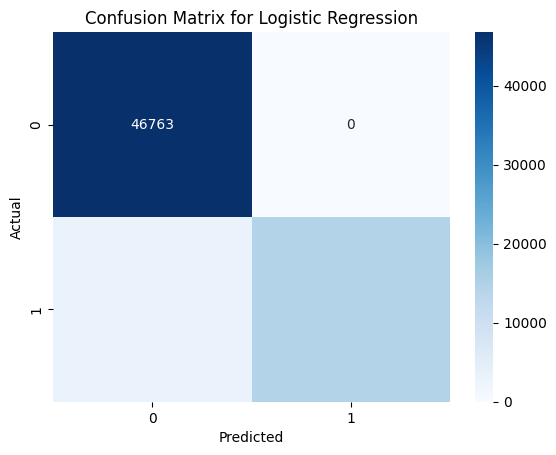

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [38]:
# ROC Curve and AUC
y_pred_proba = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

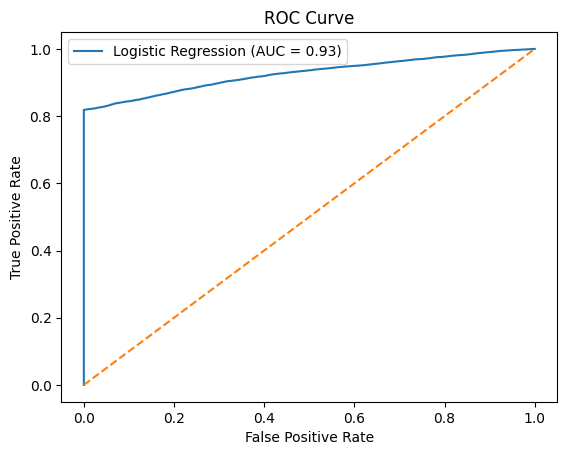

In [39]:
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#2. K-Means Clustering for Accident Types

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [44]:
cluster_features = ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF MOTORIST INJURED', 'YEAR', 'MONTH', 'DAY_OF_WEEK']

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cluster_features])

In [46]:
df.head()

,YEAR,MONTH,DAY_OF_WEEK,NUMBER OF PEDESTRIANS INJURED,NUMBER OF MOTORIST INJURED,INJURY,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
3,2021,9,5,0.0,0.0,0,True,False,False,False
4,2021,12,1,0.0,0.0,0,True,False,False,False
7,2021,12,1,0.0,2.0,1,False,False,False,False
8,2021,12,1,0.0,0.0,0,True,False,False,False
9,2021,12,1,0.0,0.0,0,False,True,False,False


In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\19403\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


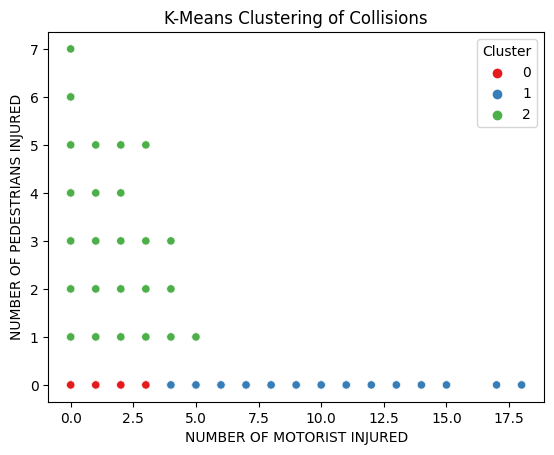

In [50]:
sns.scatterplot(x=df['NUMBER OF MOTORIST INJURED'], y=df['NUMBER OF PEDESTRIANS INJURED'], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering of Collisions')
plt.show()

In [51]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-0.25867991 -0.14408896 -0.70516563  0.08416896 -0.01677411]
 [-0.25867991  0.28821692  1.08798812 -0.1388168   0.03769975]
 [ 3.65051583 -0.32608971  0.16449178  0.02923595 -0.06059567]]


In [52]:
print(df['INJURY'].value_counts())

INJURY
0    233745
1     88324
Name: count, dtype: int64
